In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop(columns=["customerID"],inplace=True)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
for col in df.columns:
    if col not in ["tenure","MonthlyCharges","TotalCharges"]:
        print(col,df[col].unique())
        print("----------------------")

gender ['Female' 'Male']
----------------------
SeniorCitizen [0 1]
----------------------
Partner ['Yes' 'No']
----------------------
Dependents ['No' 'Yes']
----------------------
PhoneService ['No' 'Yes']
----------------------
MultipleLines ['No phone service' 'No' 'Yes']
----------------------
InternetService ['DSL' 'Fiber optic' 'No']
----------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
----------------------
OnlineBackup ['Yes' 'No' 'No internet service']
----------------------
DeviceProtection ['No' 'Yes' 'No internet service']
----------------------
TechSupport ['No' 'Yes' 'No internet service']
----------------------
StreamingTV ['No' 'Yes' 'No internet service']
----------------------
StreamingMovies ['No' 'Yes' 'No internet service']
----------------------
Contract ['Month-to-month' 'One year' 'Two year']
----------------------
PaperlessBilling ['Yes' 'No']
----------------------
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [11]:
for col in ["tenure","MonthlyCharges","TotalCharges"]:
    print(col,len(df[df[col]==" "]))
    print("------------------")

tenure 0
------------------
MonthlyCharges 0
------------------
TotalCharges 11
------------------


In [12]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"}).astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
df.shape

(7043, 20)

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
def plot_distribution(df,column_name):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
    plt.axvline(col_median,color="blue",linestyle="--",label="Median")
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(y=df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()
    
    
    
    

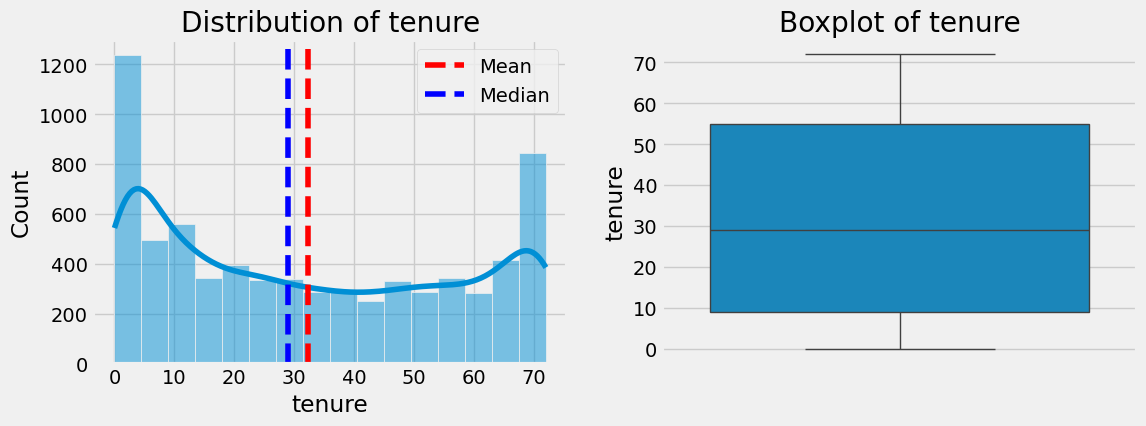

In [18]:
plot_distribution(df,"tenure")

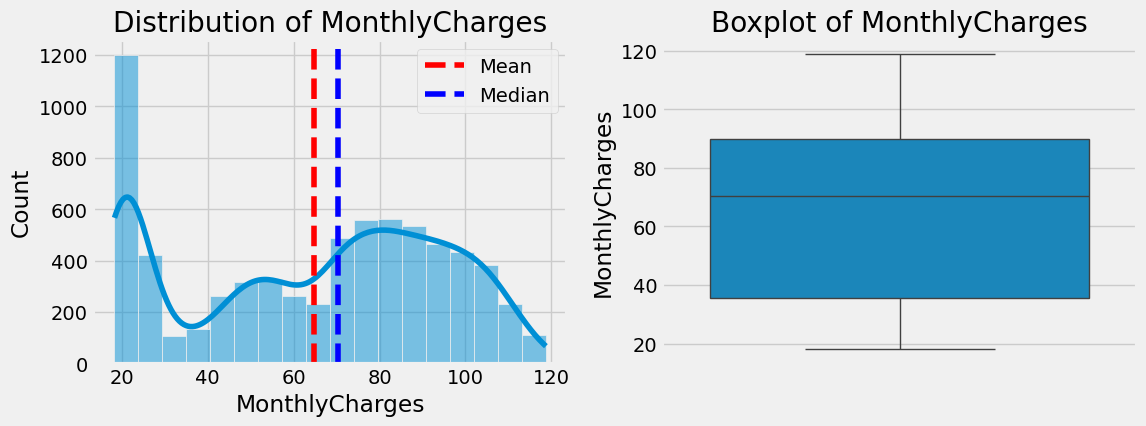

In [19]:
plot_distribution(df,"MonthlyCharges")

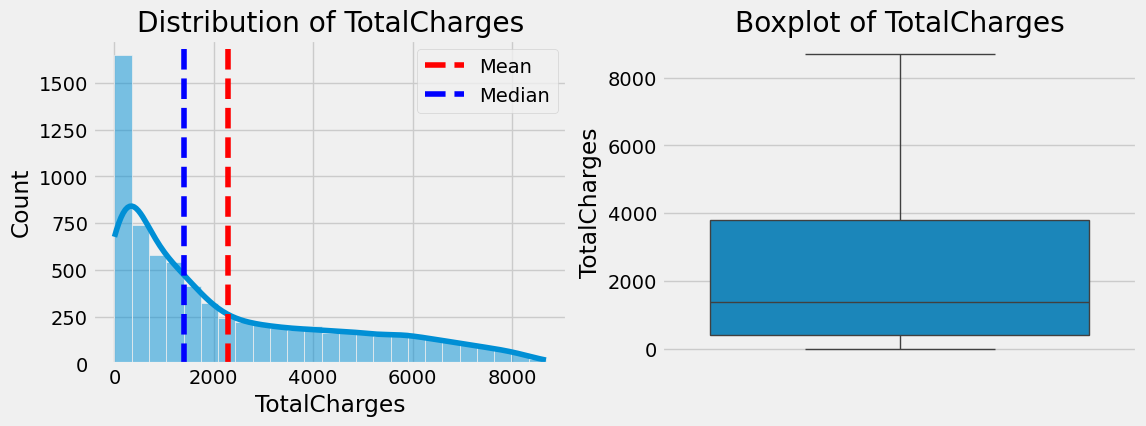

In [20]:
plot_distribution(df,"TotalCharges")

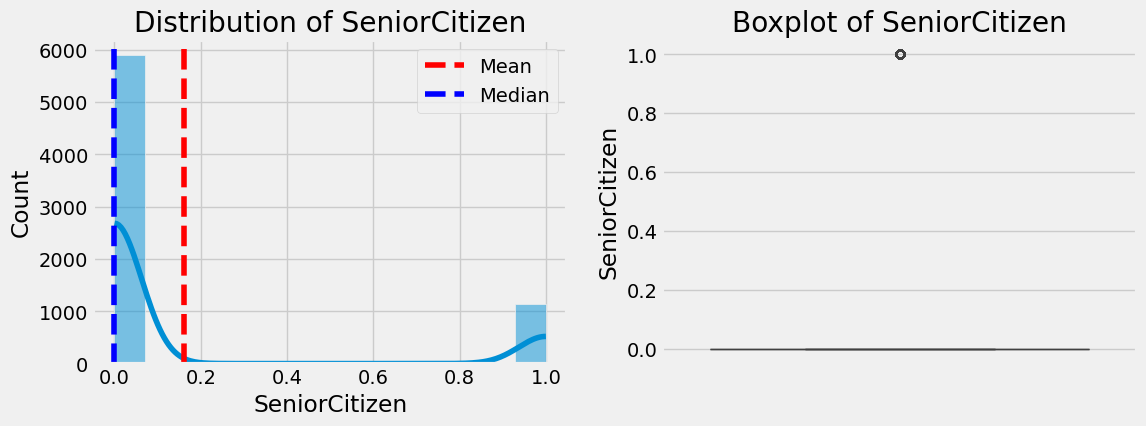

In [21]:
plot_distribution(df,"SeniorCitizen")

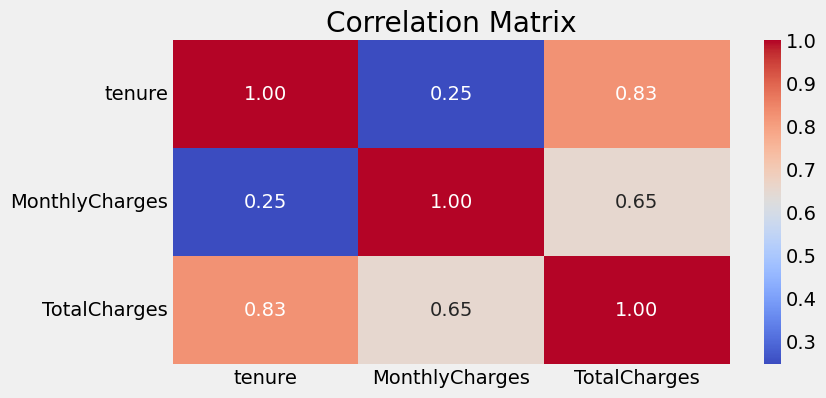

In [22]:
plt.figure(figsize = (8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()


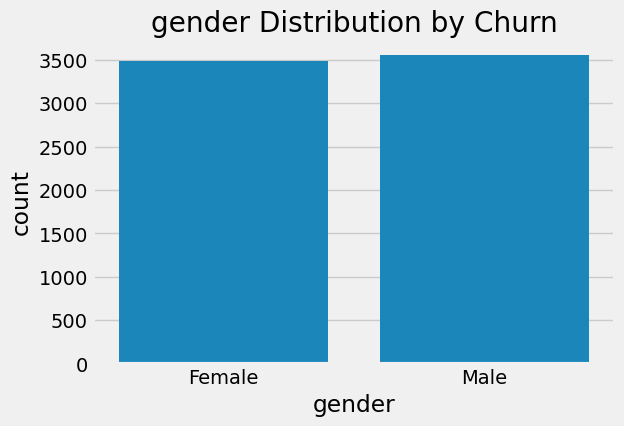

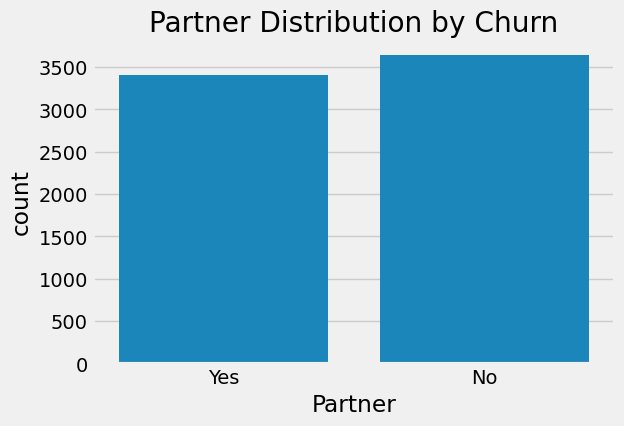

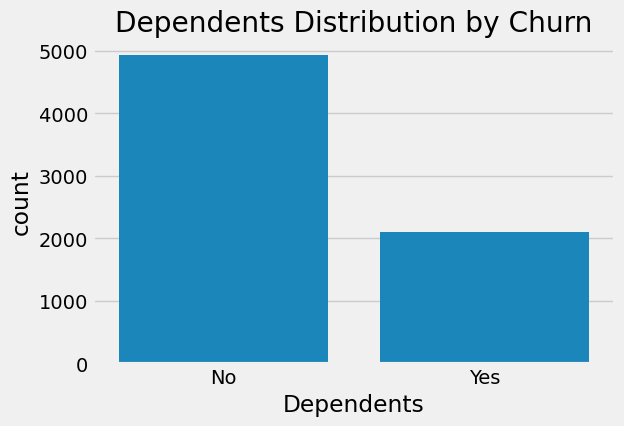

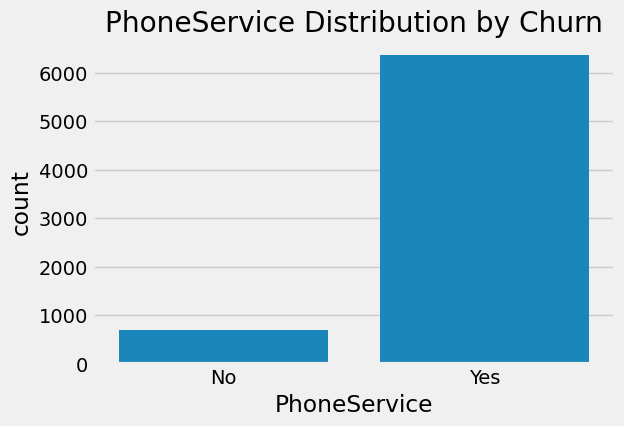

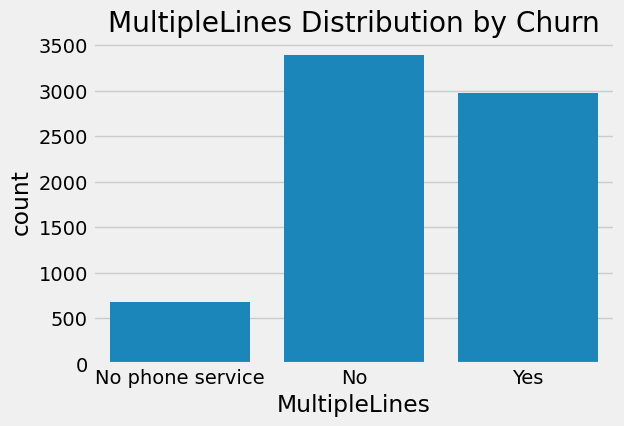

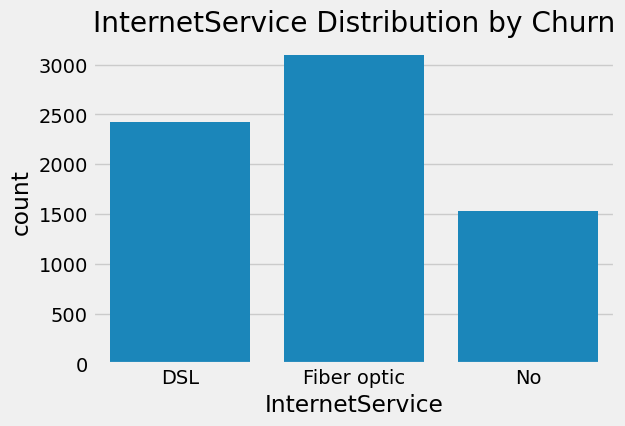

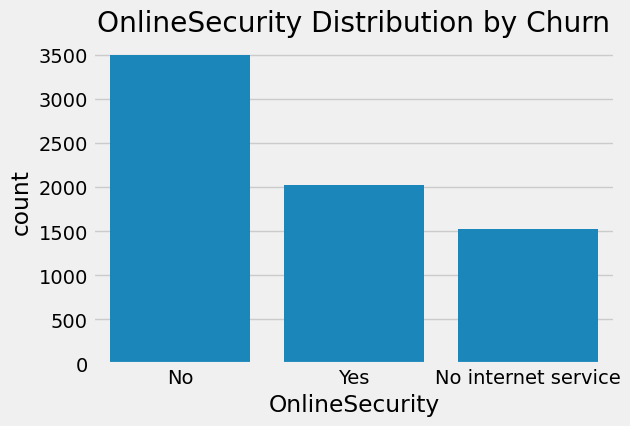

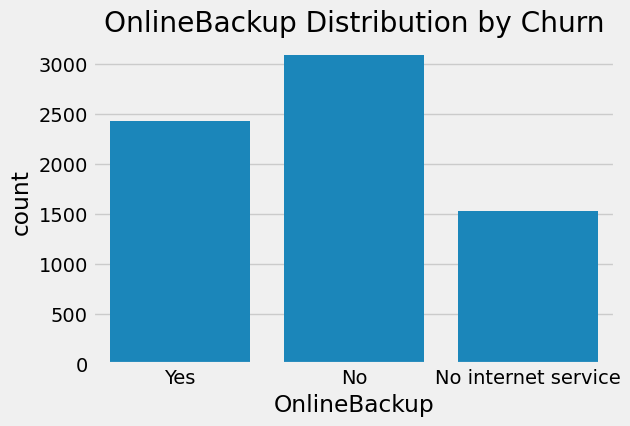

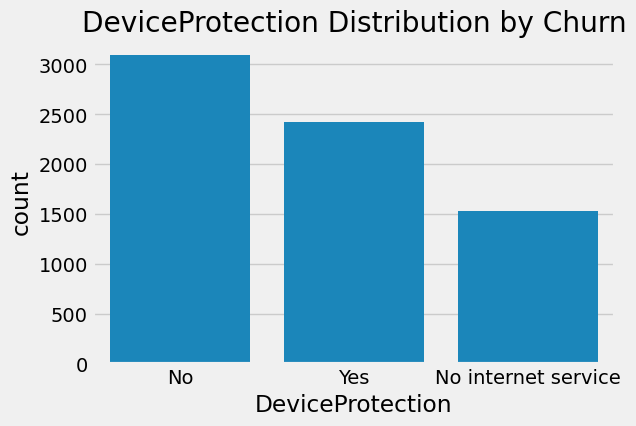

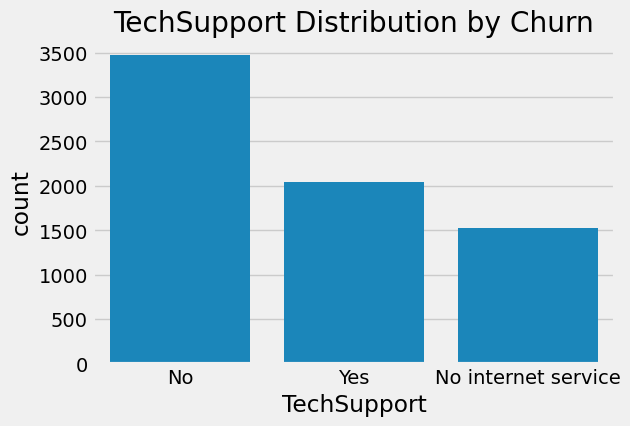

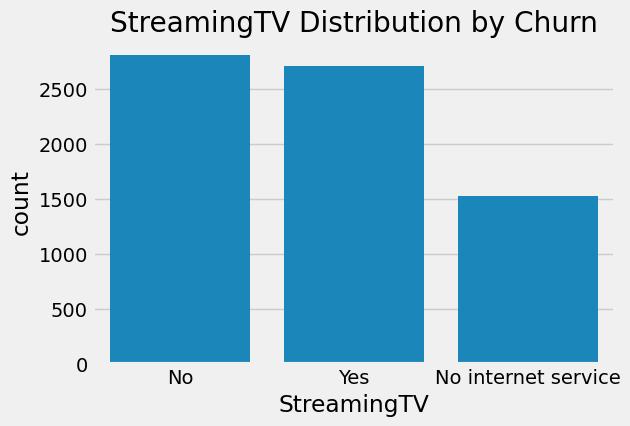

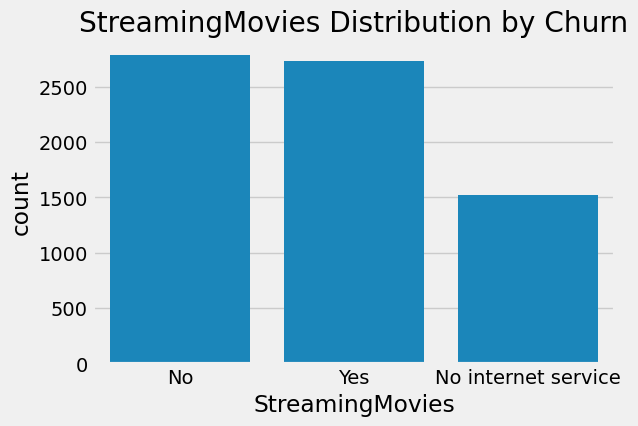

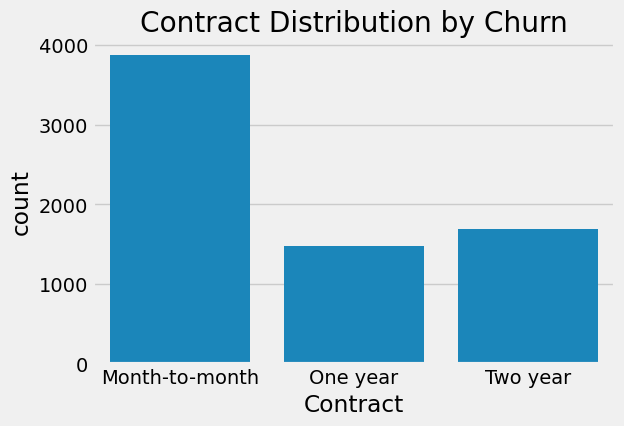

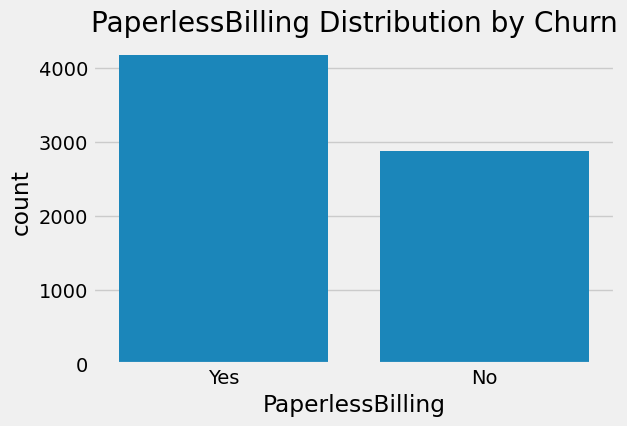

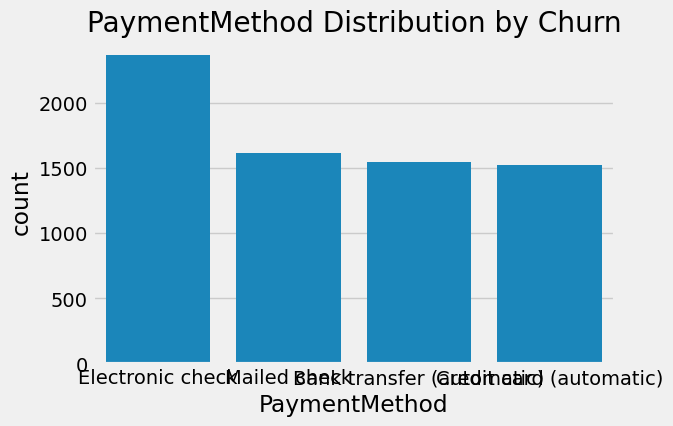

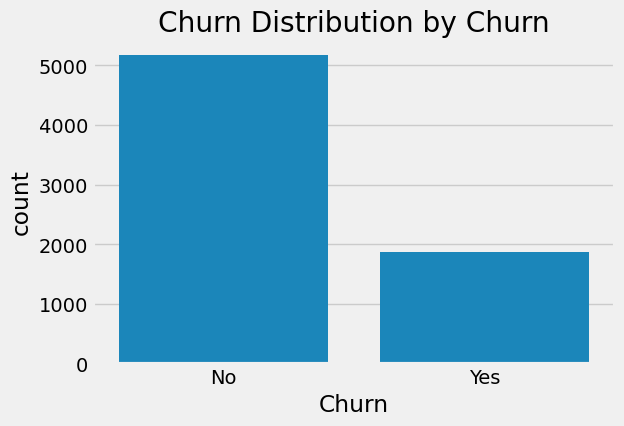

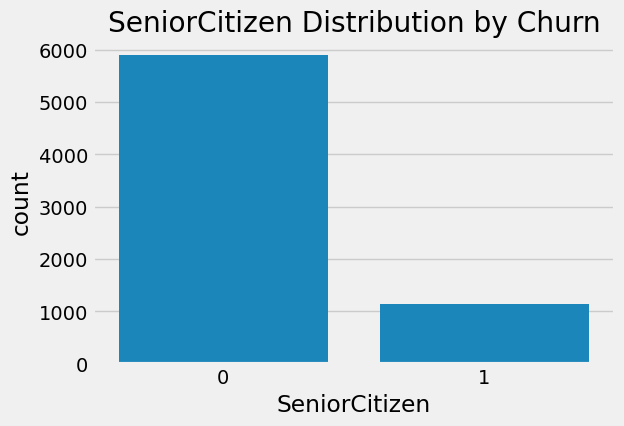

In [23]:
categorical_cols = df.select_dtypes(include = "object").columns.to_list() + ['SeniorCitizen']

for col in categorical_cols:
    plt.figure(figsize = (6, 4))
#     sns.countplot(data = df, x = col, hue = 'Churn')
    sns.countplot(x = df[col])
    plt.title(f"{col} Distribution by Churn")
    plt.show()


In [24]:
#Label Encoding
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


C:\Users\Sumit Singh Baghel\AppData\Local\Temp\ipykernel_20380\171870675.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
objects_columns = df.select_dtypes(include = "object").columns

In [27]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder


In [28]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [30]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [33]:
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [35]:
X = df.drop(columns = ['Churn'])
y = df['Churn']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [37]:
y_train.value_counts()


Churn
0    4138
1    1496
Name: count, dtype: int64

In [38]:
smote = SMOTE(random_state = 42)


In [40]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [41]:
y_train_smote.value_counts()


Churn
0    4138
1    4138
Name: count, dtype: int64

In [42]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [43]:
hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}


In [44]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")


Tunning Random Forest......
Best parameters for Random Forest : {'max_depth': None, 'n_estimators': 200}
Best Accuracy for Random Forest :  0.84

Tunning XGBoost......
Best parameters for XGBoost : {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy for XGBoost :  0.82



In [45]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)


In [46]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [47]:
y_test_pred = best_models['Random Forest'].predict(X_test)
y_test_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]


In [48]:
y_test_pred


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
y_test_prob


array([0.905, 0.425, 0.025, ..., 0.015, 0.01 , 0.38 ])

In [50]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report : \n", classification_report(y_test, y_test_pred))


Accuracy :  0.7814052519517388
ROC - AUC Score :  0.7466927862370222
Confusion Matrix : 
 [[850 186]
 [122 251]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.57      0.67      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409



In [51]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler_data =pickle.load(f)


In [52]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [53]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [54]:
prediction, prob = make_prediction(example_input)

In [55]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: No Churn, Probability :  0.24


In [56]:
pip install fastapi uvicorn pandas scikit-learn xgboost


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 1.4 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/2.0 MB 1.4 MB/s eta 0:00:02
   --------------- ------------------------ 0.8/2.0 MB 1.2 MB/s eta 0:00:02
   -------------------- ------------------- 1.0/2.0 MB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/2.0 MB 1.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.1 MB/s  0:00:01

   -------- ------------------------------- 2/9 [click]
   -------- ------------------------------- 2/9 [click]
   ---------------------- ----------------- 5/9 [uvicorn]
   ---------------------- ----------------- 5/9 [uvicorn]
   ---------------------- --